In [52]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from CSIKit.reader import get_reader
from CSIKit.util import csitools
from CSIKit.tools.batch_graph import BatchGraph
import matplotlib.pyplot as plt
import seaborn as sns

Getting names of all CSI files

In [36]:
sci_dir='data/'
filenames = [f[:-5] for f in listdir(sci_dir)
    if isfile(join(sci_dir, f))]
filenames

['brushteeth_1591629178',
 'brushteeth_1591629182',
 'brushteeth_1591629186',
 'brushteeth_1591629190',
 'brushteeth_1591629194',
 'brushteeth_1591629198',
 'brushteeth_1591629202',
 'brushteeth_1591629206',
 'brushteeth_1591629211',
 'brushteeth_1591629215',
 'brushteeth_1591629219',
 'brushteeth_1591629223',
 'brushteeth_1591629227',
 'brushteeth_1591629231',
 'brushteeth_1591629235',
 'brushteeth_1591629239',
 'brushteeth_1591629243',
 'brushteeth_1591629248',
 'brushteeth_1591629252',
 'brushteeth_1591629256',
 'brushteeth_1591629260',
 'brushteeth_1591629264',
 'brushteeth_1591629268',
 'brushteeth_1591629272',
 'brushteeth_1591629276',
 'brushteeth_1591629280',
 'brushteeth_1591629285',
 'brushteeth_1591629289',
 'brushteeth_1591629293',
 'brushteeth_1591629297',
 'brushteeth_1591629301',
 'brushteeth_1591629305',
 'brushteeth_1591629309',
 'brushteeth_1591629313',
 'brushteeth_1591629317',
 'brushteeth_1591629322',
 'brushteeth_1591629326',
 'brushteeth_1591629330',
 'brushteeth

Parsing .pcap files, acquiring CSI amplitudes.

In [37]:
dfs={}
i=0
for f in filenames:
    print(f,i)
    i+=1
    my_reader = get_reader(join(sci_dir, f+".pcap"))
    csi_data = my_reader.read_file(join(sci_dir, f+".pcap"), scaled=True)
    csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")
    dfs[f]=pd.DataFrame(csi_matrix[:, :, 0, 0])
    

brushteeth_1591629178 0
brushteeth_1591629182 1
brushteeth_1591629186 2
brushteeth_1591629190 3
brushteeth_1591629194 4
brushteeth_1591629198 5
brushteeth_1591629202 6
brushteeth_1591629206 7
brushteeth_1591629211 8
brushteeth_1591629215 9
brushteeth_1591629219 10
brushteeth_1591629223 11
brushteeth_1591629227 12
brushteeth_1591629231 13
brushteeth_1591629235 14
brushteeth_1591629239 15
brushteeth_1591629243 16
brushteeth_1591629248 17
brushteeth_1591629252 18
brushteeth_1591629256 19
brushteeth_1591629260 20
brushteeth_1591629264 21
brushteeth_1591629268 22
brushteeth_1591629272 23
brushteeth_1591629276 24
brushteeth_1591629280 25
brushteeth_1591629285 26
brushteeth_1591629289 27
brushteeth_1591629293 28
brushteeth_1591629297 29
brushteeth_1591629301 30
brushteeth_1591629305 31
brushteeth_1591629309 32
brushteeth_1591629313 33
brushteeth_1591629317 34
brushteeth_1591629322 35
brushteeth_1591629326 36
brushteeth_1591629330 37
brushteeth_1591629334 38
brushteeth_1591629338 39
brushteeth

In [39]:
df=dfs[filenames[-1]]
df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-39.974250,-44.421902,-56.530436,-49.540736,-50.509836,-46.423197,-12.491599,-9.243774,-7.514913,-5.720241,...,-15.150411,-10.886083,-7.970825,-5.884312,-4.779233,-62.551036,-41.906456,-40.592039,-45.561336,-53.008611
1,-50.522500,-44.434566,-52.563700,-59.553400,-49.553400,-50.010975,-12.423159,-9.299256,-7.509025,-5.598170,...,-15.195912,-11.467982,-8.343303,-6.081144,-4.974641,-43.990375,-45.661739,-41.424266,-48.413967,-40.831837
2,-44.689419,-44.413584,-49.532417,-55.553017,-50.238228,-39.098794,-12.812132,-9.433810,-7.143680,-5.428112,...,-15.313007,-11.373984,-8.247504,-6.179634,-4.797722,-55.553017,-47.491217,-41.573617,-50.501517,-43.048817
3,-47.933366,-44.428212,-43.526446,-47.505846,-53.014921,-50.252857,-13.736371,-10.243211,-7.189237,-5.339100,...,-13.989513,-10.324516,-7.759693,-6.179357,-5.065659,-46.994321,-42.387013,-42.689629,-45.314587,-48.407612
4,-46.012607,-44.415598,-56.524132,-47.229943,-49.992007,-43.406593,-12.564930,-9.648085,-7.829277,-5.645528,...,-15.283656,-11.227744,-8.079981,-5.909136,-4.903000,-46.012607,-46.416893,-44.415598,-48.565332,-52.544732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-43.259888,-44.424944,-46.533477,-59.543777,-37.841160,-48.404344,-13.177594,-9.400378,-6.767949,-5.138426,...,-13.737892,-10.414732,-7.931176,-6.417921,-5.163467,-49.543777,-43.920849,-49.543777,-48.404344,-48.404344
334,-48.396406,-44.417006,-inf,-51.406706,-46.014014,-51.406706,-12.799319,-9.560818,-6.818539,-5.282845,...,-13.714069,-10.429568,-7.861189,-6.460013,-5.201198,-42.015355,-48.566739,-42.502926,-45.556439,-44.911860
335,-44.159595,-44.603786,-55.743220,-43.438731,-53.702020,-46.712320,-46.605081,-53.190495,-46.712320,-48.583186,...,-24.326841,-17.808669,-27.624790,-21.367934,-18.853152,-20.772540,-17.031929,-48.108940,-48.753520,-45.743220
336,-40.828060,-44.430789,-44.234833,-55.570222,-52.559923,-43.265733,-12.267952,-9.530534,-7.041399,-5.451475,...,-14.677037,-10.606545,-8.109660,-6.172615,-5.095691,-42.692205,-47.245133,-40.828060,-39.704349,-48.580522


Converting to .csv

In [44]:
i=0
for f in filenames:
    print(f,i)
    i+=1
    dfs[f].to_csv(join('csi_csv/',f+".csv"),index=False)

brushteeth_1591629178 0
brushteeth_1591629182 1
brushteeth_1591629186 2
brushteeth_1591629190 3
brushteeth_1591629194 4
brushteeth_1591629198 5
brushteeth_1591629202 6
brushteeth_1591629206 7
brushteeth_1591629211 8
brushteeth_1591629215 9
brushteeth_1591629219 10
brushteeth_1591629223 11
brushteeth_1591629227 12
brushteeth_1591629231 13
brushteeth_1591629235 14
brushteeth_1591629239 15
brushteeth_1591629243 16
brushteeth_1591629248 17
brushteeth_1591629252 18
brushteeth_1591629256 19
brushteeth_1591629260 20
brushteeth_1591629264 21
brushteeth_1591629268 22
brushteeth_1591629272 23
brushteeth_1591629276 24
brushteeth_1591629280 25
brushteeth_1591629285 26
brushteeth_1591629289 27
brushteeth_1591629293 28
brushteeth_1591629297 29
brushteeth_1591629301 30
brushteeth_1591629305 31
brushteeth_1591629309 32
brushteeth_1591629313 33
brushteeth_1591629317 34
brushteeth_1591629322 35
brushteeth_1591629326 36
brushteeth_1591629330 37
brushteeth_1591629334 38
brushteeth_1591629338 39
brushteeth

In [45]:
df=pd.read_csv(join('csi_csv/',filenames[-1]+".csv"))
df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-39.974250,-44.421902,-56.530436,-49.540736,-50.509836,-46.423197,-12.491599,-9.243774,-7.514913,-5.720241,...,-15.150411,-10.886083,-7.970825,-5.884312,-4.779233,-62.551036,-41.906456,-40.592039,-45.561336,-53.008611
1,-50.522500,-44.434566,-52.563700,-59.553400,-49.553400,-50.010975,-12.423159,-9.299256,-7.509025,-5.598170,...,-15.195912,-11.467982,-8.343303,-6.081144,-4.974641,-43.990375,-45.661739,-41.424266,-48.413967,-40.831837
2,-44.689419,-44.413584,-49.532417,-55.553017,-50.238228,-39.098794,-12.812132,-9.433810,-7.143680,-5.428112,...,-15.313007,-11.373984,-8.247504,-6.179634,-4.797722,-55.553017,-47.491217,-41.573617,-50.501517,-43.048817
3,-47.933366,-44.428212,-43.526446,-47.505846,-53.014921,-50.252857,-13.736371,-10.243211,-7.189237,-5.339100,...,-13.989513,-10.324516,-7.759693,-6.179357,-5.065659,-46.994321,-42.387013,-42.689629,-45.314587,-48.407612
4,-46.012607,-44.415598,-56.524132,-47.229943,-49.992007,-43.406593,-12.564930,-9.648085,-7.829277,-5.645528,...,-15.283656,-11.227744,-8.079981,-5.909136,-4.903000,-46.012607,-46.416893,-44.415598,-48.565332,-52.544732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-43.259888,-44.424944,-46.533477,-59.543777,-37.841160,-48.404344,-13.177594,-9.400378,-6.767949,-5.138426,...,-13.737892,-10.414732,-7.931176,-6.417921,-5.163467,-49.543777,-43.920849,-49.543777,-48.404344,-48.404344
334,-48.396406,-44.417006,-inf,-51.406706,-46.014014,-51.406706,-12.799319,-9.560818,-6.818539,-5.282845,...,-13.714069,-10.429568,-7.861189,-6.460013,-5.201198,-42.015355,-48.566739,-42.502926,-45.556439,-44.911860
335,-44.159595,-44.603786,-55.743220,-43.438731,-53.702020,-46.712320,-46.605081,-53.190495,-46.712320,-48.583186,...,-24.326841,-17.808669,-27.624790,-21.367934,-18.853152,-20.772540,-17.031929,-48.108940,-48.753520,-45.743220
336,-40.828060,-44.430789,-44.234833,-55.570222,-52.559923,-43.265733,-12.267952,-9.530534,-7.041399,-5.451475,...,-14.677037,-10.606545,-8.109660,-6.172615,-5.095691,-42.692205,-47.245133,-40.828060,-39.704349,-48.580522


line plot of one frame

<AxesSubplot:>

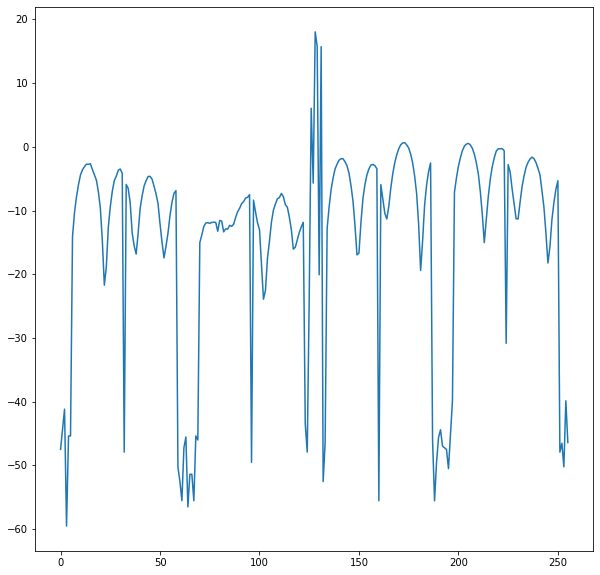

In [63]:
(df.iloc[30,:]).plot.line(figsize=[10,10], legend=False)

line plot of one subcarrier

<AxesSubplot:>

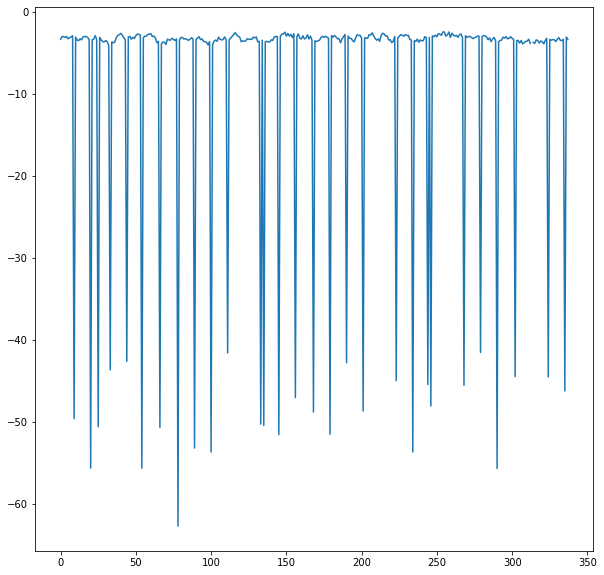

In [64]:
(df.iloc[:,30]).plot.line(figsize=[10,10], legend=False)

line plot of 10 subcarriers

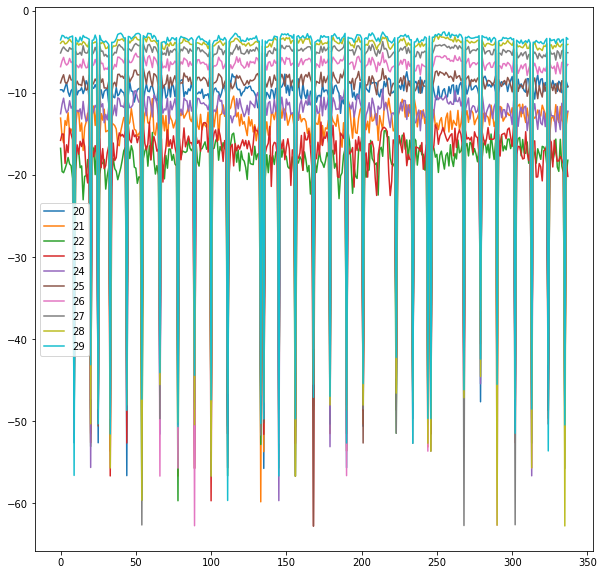

In [65]:
for i in range(20,30):
    (df.iloc[:,i]).plot.line(figsize=[10,10], label=str(i),legend=True)

subcarrier correlation plot

<AxesSubplot:>

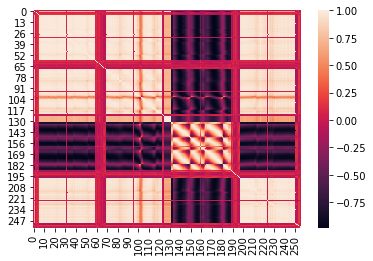

In [61]:
sns.heatmap(df.corr())

amplitude heatmap

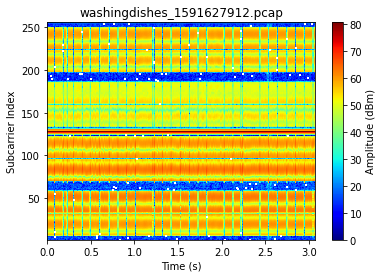

In [62]:
bg=BatchGraph(join(sci_dir,filenames[-1]+".pcap"))
bg.heatmap()